# Michael Foster's Final Project for BISC450C
## Python for Computational Biology - Spring 2023
#### https://github.com/mjfos2r/Python-BISC450C

<hr><font color="green"><h1>01.IntroToJupyterNotebook</h1></font>

In [1]:
#########################################
# Michael Foster's Tutorial Notebook :) #
#########################################

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [33]:
df = pd.read_csv('fortune500.csv')

In [34]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [35]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [36]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [37]:
len(df)

25500

In [38]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [39]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()


14.409831723

In [40]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [11]:
len(df.profit[non_numberic_profits])

369

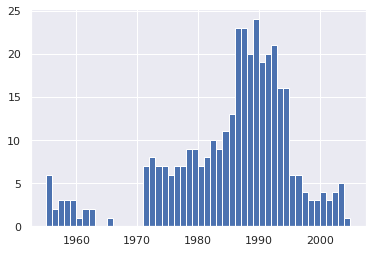

In [12]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [13]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [14]:
len(df)

25131

In [15]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [16]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

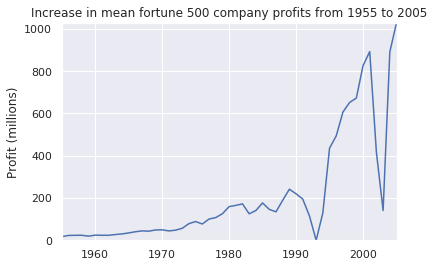

In [17]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

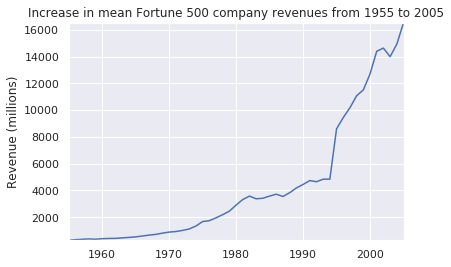

In [18]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

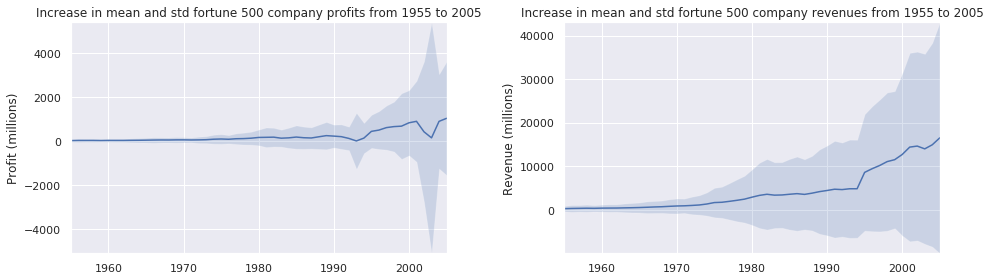

In [19]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()

In [21]:
#gonna use this a lot in my future analyses :)

<hr><font color="green"><h1>02.PythonFundamentals</h1></font>

In [ ]:
#######################
# Python Fundamentals #
#######################

In [17]:
# Any python interpreter can be used as a calculator: 
3 + 5 * 4

23

In [18]:
# lets set a variable to a value
weight_kg = 60

In [19]:
print(weight_kg)

60


In [20]:
# weight0 = valid
# 0weight = invalid
# weight and Weight are different

In [21]:
# Types of data
# three common types of data
## Integers
## floating point numbers
## strings

In [22]:
# floating point number
weight_kg = 60.3

# string of letters
patient_name = 'John Smith'

#String comprised of numbers
patient_id = '001'

In [23]:
# use variables in python

# convert weight in kg to lbs
weight_lb = 2.2 * weight_kg

print(weight_lb)

132.66


In [24]:
# can add to strings
#lets add a prefix to patient ID
patient_id = 'inflam_' + patient_id
print(patient_id)

inflam_001


In [25]:
# lets combine print statements
print(patient_id, 'weight in kg:', weight_kg)

inflam_001 weight in kg: 60.3


In [26]:
# we can call a function inside another function
print(type(60.3))
print(type(patient_id))

<class 'float'>
<class 'str'>


In [27]:
# we can also do calculations inside the print function
print('weight in lbs:', 2.2 * weight_kg)

weight in lbs: 132.66


In [28]:
print(weight_kg)

60.3


In [29]:
weight_kg = 65.0
print('weight in kilograms is now:', weight_kg)

weight in kilograms is now: 65.0


<hr><font color="green"><h1>03.AnalyzingPtData</h1></font>

In [1]:
##########################
# Analyzing Patient Data #
##########################

In [ ]:
###########
# Part 1. #
###########

In [2]:
import numpy

In [3]:
numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter = ',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [4]:
data = numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter = ',')

In [5]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [6]:
print(type(data))

<class 'numpy.ndarray'>


In [7]:
print(data.shape)

(60, 40)


In [8]:
# arrays start at 0
print('first value in data:', data[0,0])

first value in data: 0.0


In [9]:
print('middle value in data:', data[29,19])

middle value in data: 16.0


In [10]:
# lets get to slicing
#0:4 = 0,1,2,3 but not 4
#0:10 = 0,1,2,3,4,5,6,7,8,9 but not 10

print(data[0:4, 0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


In [11]:
print(data[5:10, 0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]


In [12]:
small = data[:3, 36:]

In [13]:
print('small is:')
print(small)

small is:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


In [14]:
###########
# Part 2. #
###########

In [15]:
# lets use a numpy function
print(numpy.mean(data))

6.14875


In [16]:
maxval, minval, stdval = numpy.amax(data), numpy.amin(data), numpy.std(data)
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


In [17]:
maxval = numpy.amax(data)
minval = numpy.amin(data)
stdval = numpy.std(data)

In [18]:
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


In [19]:
# sometimes we want to look at variation in statistical values,
# such as maxmimum inflammation per patient or average from day 1

patient_0 = data[0, :] # 0 for first axis (rows), everything on the second (columns)
print('maximum inflammation for patient_0:', numpy.amax(patient_0))

maximum inflammation for patient_0: 18.0


In [20]:
# now lets look at patient 2
patient_2 = data[2, :]
print('maximum inflammation for patient_2:', numpy.amax(patient_2))

maximum inflammation for patient_2: 19.0


In [21]:
# ok lets get max inflammation for all patients
# axis = 0 gives column averages
# axis = 1 gives row averages

print(numpy.mean(data, axis = 0))

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


In [22]:
print(numpy.mean(data, axis = 0).shape)

(40,)


In [23]:
print(numpy.mean(data, axis = 1))

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


In [24]:
###########
# Part 3. #
###########

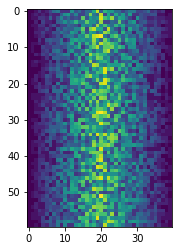

In [29]:
import matplotlib.pyplot

#heatmap of patient inflammation over time
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

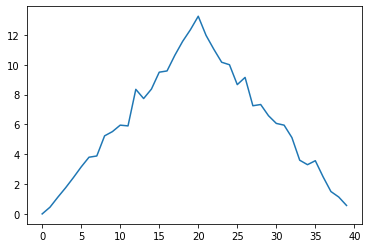

In [30]:
# average inflammation over time
# axis = 0 <- average across columns
ave_inflammation = numpy.mean(data, axis = 0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show()

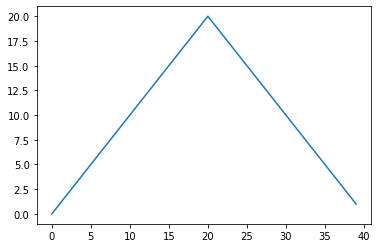

In [31]:
max_plot = matplotlib.pyplot.plot(numpy.amax(data, axis = 0))
matplotlib.pyplot.show()

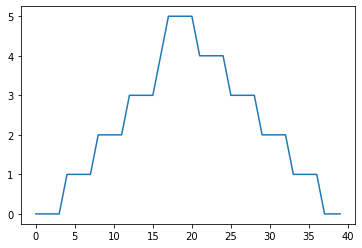

In [32]:
min_plot = matplotlib.pyplot.plot(numpy.amin(data, axis = 0))
matplotlib.pyplot.show()

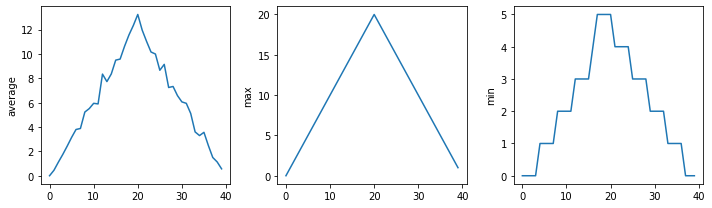

In [36]:
fig = matplotlib.pyplot.figure(figsize =(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis = 0))

axes2.set_ylabel('max')
axes2.plot(numpy.amax(data, axis = 0))

axes3.set_ylabel('min')
axes3.plot(numpy.amin(data, axis = 0))

fig.tight_layout()

matplotlib.pyplot.savefig('inflammation.png')
matplotlib.pyplot.show()

<hr><font color="green"><h1>04.Lists</h1></font>

In [ ]:
###########################
# Storing Values in Lists #
###########################

In [1]:
odds = [1,3,5,7]
print("odds are:", odds)

odds are: [1, 3, 5, 7]


In [4]:
print('first element:', odds[0])
print('last element:', odds[3])
# Can count backwards in lists! 
print('"-1" element:', odds [-1])
print('"-2" element:', odds [-2])
print('"-3" element:', odds [-3])

first element: 1
last element: 7
"-1" element: 7
"-2" element: 5
"-3" element: 3


In [6]:
# we can change lists, we can't change strings
names = ['Curie', 'Darwing', 'Turing'] # Typo in Darwin's name
print('names is originally:', names)
names[1] = 'Darwin' # correct the name
print('Final value of names:', names)

names is originally: ['Curie', 'Darwing', 'Turing']
Final value of names: ['Curie', 'Darwin', 'Turing']


In [8]:
#name = 'Darwin'
#name[0] = 'd'
#gives the following:
#TypeError: 'str' object does not support item assignment

In [9]:
odds.append(11)
print('odds after adding a value:', odds)

odds after adding a value: [1, 3, 5, 7, 11]


In [10]:
# Push = add to list
# pop = remove from list
# origin is from the early early days of computing
removed_element = odds.pop(0)
print('odds after removing the first element:', odds)
print('removed element:', removed_element)

odds after removing the first element: [3, 5, 7, 11]
removed element: 1


In [11]:
odds.reverse()
print('odds after reversing:', odds)

odds after reversing: [11, 7, 5, 3]


In [12]:
odds = [3,5,7]
#primes and odds are the same
primes = odds
primes.append(2)
#output shows that they are treated the same
print('primes:', primes)
print('odds:', odds)

primes: [3, 5, 7, 2]
odds: [3, 5, 7, 2]


In [13]:
odds = [3,5,7]
#primes is a copy of odds
primes = list(odds)
primes.append(2)
#output shows that they are not treated as the same object
print('primes:', primes)
print('odds:', odds)

primes: [3, 5, 7, 2]
odds: [3, 5, 7]


In [16]:
binomial_name = "Drosophila melanogaster"
group = binomial_name[0:10]
print('group:', group)

species = binomial_name[11:23]
print('species:', species)

chromosomes = ['X', 'Y', '2', '3', '4']
autosomes = chromosomes[2:5]
print('autosomes:', autosomes)

last = chromosomes[-1]
print('last:', last)

group: Drosophila
species: melanogaster
autosomes: ['2', '3', '4']
last: 4


In [17]:
date = 'Sunday 14 May 2023'
day = date[0:6]
print('using 0 to begin range:', day)
day = date[:6]
print('omitting beginning index:', day)

using 0 to begin range: Sunday
omitting beginning index: Sunday


In [20]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sond = months[8:12]
print('with known last positions:', sond)

sond = months[8:len(months)]
print('using len() to get last entry:', sond)

sond = months[8:]
print('omitting ending index:', sond)

with known last positions: ['Sep', 'Oct', 'Nov', 'Dec']
using len() to get last entry: ['Sep', 'Oct', 'Nov', 'Dec']
omitting ending index: ['Sep', 'Oct', 'Nov', 'Dec']


<hr><font color="green"><h1>05.Loops</h1></font>

In [1]:
##########
# Loops! #
##########

In [3]:
odds = [1,3,5,7]

In [4]:
print(odds[0])
print(odds[1])
print(odds[2])
print(odds[3])

1
3
5
7


In [6]:
#example of why the above is not optimal
odds = [1,3,5]
print(odds[0])
print(odds[1])
print(odds[2])
#print(odds[3])
#gives: IndexError: list index out of range


1
3
5


In [8]:
# ok so lets make a loop now

odds = [1,3,5,7,9,11,13,15,17,19]
for num in odds:
    print(num)
# refer to loop cycle diagram

1
3
5
7
9
11
13
15
17
19


In [12]:
length = 0
names = ['Curie', 'Darwin', 'Turing']
for value in names:
    length = length + 1
    print('I have counted', length, 'names')
print('There are', length, 'names in the list.')

I have counted 1 names
I have counted 2 names
I have counted 3 names
There are 3 names in the list.


In [15]:
name = 'Rosalind'
# Don't reuse variable names for loops, it will overwrite your variable for the loop
for name in ['Curie', 'Darwin', 'Turing']:
    print(name)
print('after the loop, name is:', name)

Curie
Darwin
Turing
after the loop, name is: Turing


In [16]:
print(len([0,1,2,3]))

4


In [17]:
name = ['Curie', 'Darwin', 'Turing']
print(len(name))

3


In [ ]:
# Loops are nicer in python than in R.
# R makes nicer plots though.

<hr><font color="green"><h1>06.UsingMultipleFiles</h1></font>

In [1]:
########################
# Using Multiple Files #
########################

In [2]:
# Back to Software Carpentry folder 
# (I refuse, I will path to the files as needed)

In [4]:
# imports library with fxn named 'glob' that can be used for 
# working with files and wildcards and regex and etc
import glob
print(glob.glob('../swc-python/data/inflammation*.csv'))

['../swc-python/data/inflammation-05.csv', '../swc-python/data/inflammation-12.csv', '../swc-python/data/inflammation-04.csv', '../swc-python/data/inflammation-08.csv', '../swc-python/data/inflammation-10.csv', '../swc-python/data/inflammation-06.csv', '../swc-python/data/inflammation-09.csv', '../swc-python/data/inflammation-01.csv', '../swc-python/data/inflammation-07.csv', '../swc-python/data/inflammation-11.csv', '../swc-python/data/inflammation-03.csv', '../swc-python/data/inflammation-02.csv']


../swc-python/data/inflammation-01.csv


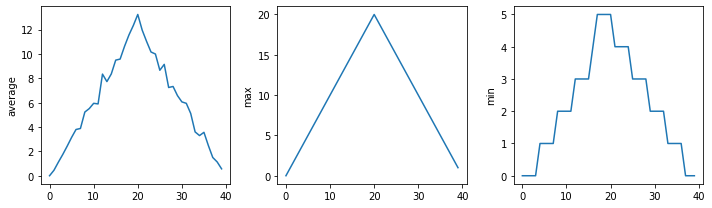

../swc-python/data/inflammation-02.csv


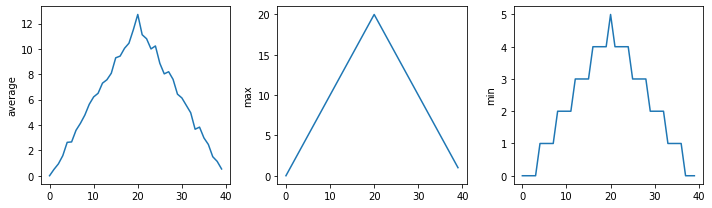

../swc-python/data/inflammation-03.csv


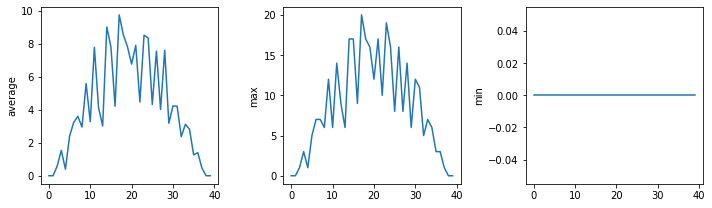

In [11]:
import numpy
import matplotlib.pyplot

#import all inflammation .csv files
filenames = sorted(glob.glob('../swc-python/data/inflammation*.csv'))
#overwrite list to only work on 3 patients rn
filenames = filenames[0:3]

for filename in filenames:
    print(filename)
    
    data = numpy.loadtxt(fname = filename, delimiter = ',')
    fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))
    
    axes1 = fig.add_subplot(1,3,1)
    axes2 = fig.add_subplot(1,3,2)
    axes3 = fig.add_subplot(1,3,3)
    
    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis = 0))
    
    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis = 0))
    
    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis = 0))
    
    fig.tight_layout()
    matplotlib.pyplot.show()
    

In [12]:
# data is sus
# always important to check for sus data
# may not be malicious but human error

<hr><font color="green"><h1>07.MakingChoices</h1></font>

In [1]:
##################
# Making Choices #
##################

In [2]:
# if, then, else

In [3]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


In [4]:
# refer to t/f flowchart

In [5]:
num = 53
print('before conditional.....')
if num > 100:
    print(num, 'is greater than 100')
print('..... after conditional')

before conditional.....
..... after conditional


In [6]:
# no print since num !> 100
# else not required

In [10]:
#now lets do elseif
num = 14
if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')

14 is positive


In [11]:
if (1 > 0) and (-1 >= 0):
    print('both parts are true')
else: 
    print('at least one part is false')

at least one part is false


In [12]:
# 1 > 0 but -1 !>= 0

In [14]:
if (1 > 0) or (-1 >= 0):
    print('at least one part is true')
else:
    print('both of these are false')

at least one part is true


In [15]:
# Moving into data folder in swc-python, I refuse, I am just going to path into it.

In [19]:
# Assuming inside swc-python/data
# just gonna set a variable to the correct path and add it to whatever is importing stuff in there
path2data= '../swc-python/data/'

import numpy

In [45]:
data = numpy.loadtxt(fname=path2data+'inflammation-01.csv', delimiter=',')

In [46]:
max_inflammation_0 = numpy.amax(data,axis = 0)[0]

In [47]:
max_inflammation_20 = numpy.amax(data, axis = 0)[20]
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!!')

Suspicious looking maxima!!


In [48]:
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!!')
elif numpy.sum(numpy.amin(data, axis = 0)) == 0:
    print('minima add up to zero')
else:
    print('seems OK')

Suspicious looking maxima!!


In [54]:
data = numpy.loadtxt(fname = path2data+'inflammation-03.csv', delimiter=',')

max_inflammation_0 = numpy.amax(data, axis = 0)[0]
max_inflammation_20 = numpy.amax(data, axis = 0)[20]

In [56]:
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('suspicious looking maxima!')
elif numpy.sum(numpy.amin(data, axis = 0)) == 0:
    print('minima add up to zero! -> HEALTHY PARTICIPANT ALERT')
else:
    print('Seems OK!')

minima add up to zero! -> HEALTHY PARTICIPANT ALERT


<hr><font color="green"><h1>08.Functions</h1></font>

In [1]:
#############
# Functions #
#############

In [2]:
###########
# Part 1. #
###########

In [3]:
# Function to convert fahrenheit into celsius
fahrenheit_val = 99
celsius_val = ((fahrenheit_val - 32) * (5/9))
print(celsius_val)

37.22222222222222


In [4]:
fahrenheit_val2 = 43
celsius_val2 = ((fahrenheit_val2 - 32) * (5/9))
print(celsius_val2)

6.111111111111112


In [5]:
def explicit_fahr_to_celsius(temp):
    # assign the converted value to a variable
    converted = ((temp - 32) * (5/9))
    return converted

In [6]:
def fahr_to_celsius(temp):
    # return converted values more efficiently using the return function without creating
    # a new variable. this code does the same thing as the previous function but it is more
    # explicit in explaining how the return command works.
    return ((temp - 32) * (5/9))

In [7]:
# ok lets try em out
fahr_to_celsius(32)

0.0

In [8]:
explicit_fahr_to_celsius(32)

0.0

In [9]:
# same results. neat

In [10]:
# can nest functions.
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('Boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
Boiling point of water: 100.0 C


In [11]:
#ok now celsius to kelvin
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in kelvin:', celsius_to_kelvin(0))

freezing point of water in kelvin: 273.15


In [12]:
# now fahrenheit to kelvin
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k
print('boiling point of water in kelvin:', fahr_to_kelvin(212.0))

boiling point of water in kelvin: 373.15


In [13]:
# print('Again, temperature in kelvin was:', temp_k)
# gives this error: NameError: name 'temp_k' is not defined
# variables in functions are LOCAL VARIABLES and are not permanent
# to use outside of function, must be defined outside of function

temp_kelvin = fahr_to_kelvin(212.0)
print('Temperature in kelvin was:', temp_kelvin)

Temperature in kelvin was: 373.15


In [14]:
temp_kelvin

373.15

In [15]:
# Variables in function = LOCAL
# Variables outside function = GLOBAL
# functions can read GLOBAL but only the function can read its own LOCAL variables

In [16]:
def print_temperature():
    print('Temperature in Fahrenheit was:', temp_fahr)
    print('Temperature in Kelvin was:', temp_kelvin)

temp_fahr = 212.0
temp_kelvin = fahr_to_kelvin(temp_fahr)

print_temperature()

Temperature in Fahrenheit was: 212.0
Temperature in Kelvin was: 373.15


In [17]:
###########
# Part 2. #
###########

In [18]:
import numpy
import glob
import matplotlib
import matplotlib.pyplot

In [19]:
def visualize(filename):
    data = numpy.loadtxt(fname = filename, delimiter = ',')
    
    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))
    
    axes1 = fig.add_subplot(1,3,1)
    axes2 = fig.add_subplot(1,3,2)
    axes3 = fig.add_subplot(1,3,3)
    
    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))
    
    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis=0))
    
    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis=0))
    
    fig.tight_layout()
    matplotlib.pyplot.show()

In [20]:
def detect_problems(filename):
    data = numpy.loadtxt(fname = filename, delimiter = ',')
    
    if numpy.amax(data, axis = 0)[0] == 0 and numpy.amax(data, axis = 0)[20] == 20:
        print('suspicious looking maxima \n')
    elif numpy.sum(numpy.amin(data, axis = 0)) == 0:
        print('minima add up to zero! \n')
    else:
        print('Seems OK. \n')

../swc-python/data/inflammation-01.csv


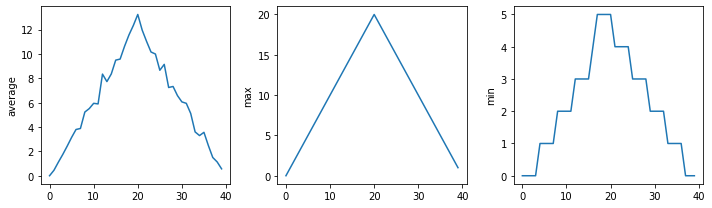

suspicious looking maxima 

../swc-python/data/inflammation-02.csv


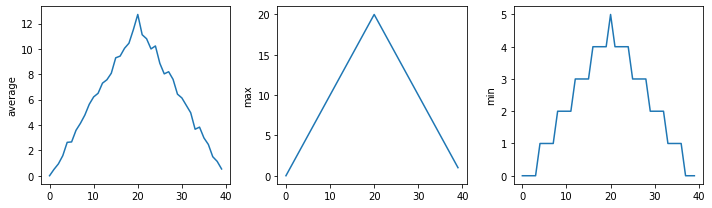

suspicious looking maxima 

../swc-python/data/inflammation-03.csv


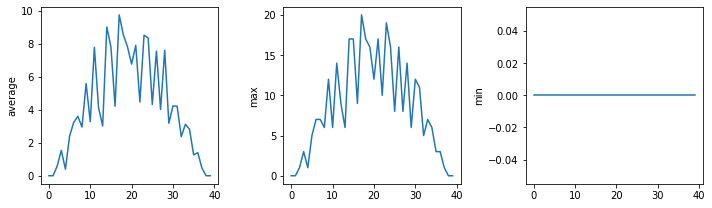

minima add up to zero! 

../swc-python/data/inflammation-04.csv


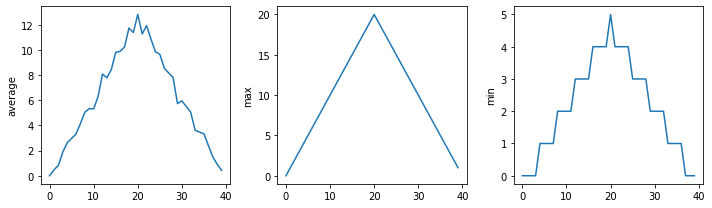

suspicious looking maxima 

../swc-python/data/inflammation-05.csv


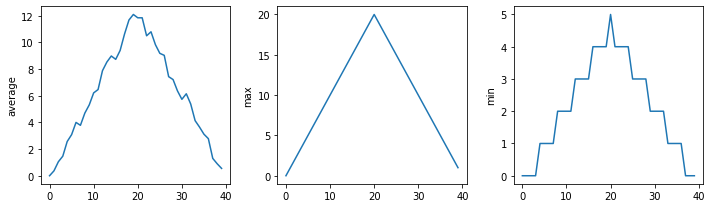

suspicious looking maxima 

../swc-python/data/inflammation-06.csv


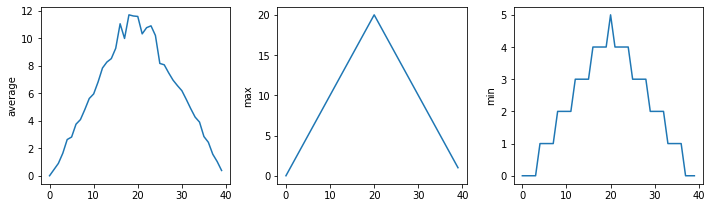

suspicious looking maxima 

../swc-python/data/inflammation-07.csv


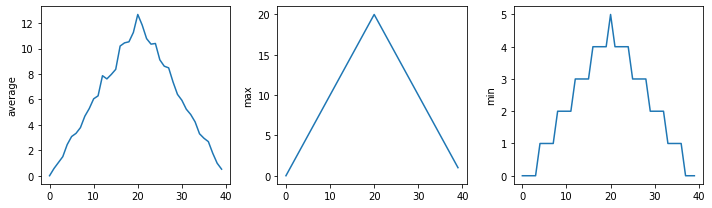

suspicious looking maxima 

../swc-python/data/inflammation-08.csv


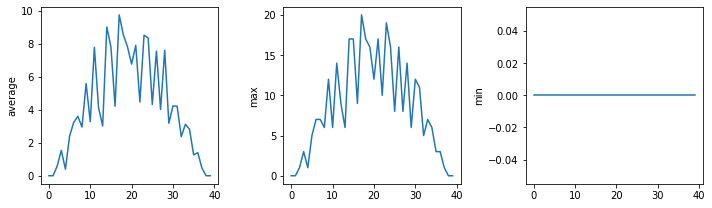

minima add up to zero! 

../swc-python/data/inflammation-09.csv


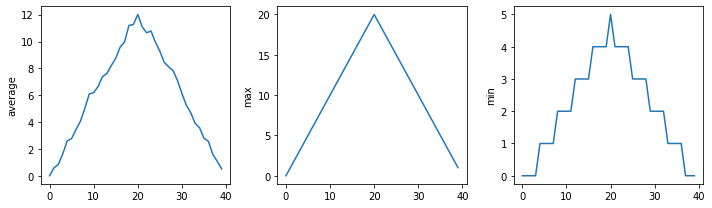

suspicious looking maxima 

../swc-python/data/inflammation-10.csv


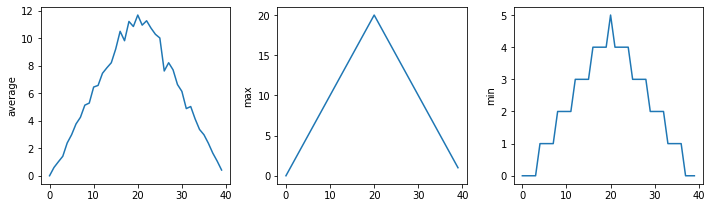

suspicious looking maxima 

../swc-python/data/inflammation-11.csv


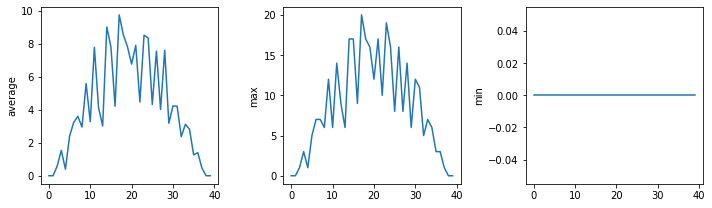

minima add up to zero! 

../swc-python/data/inflammation-12.csv


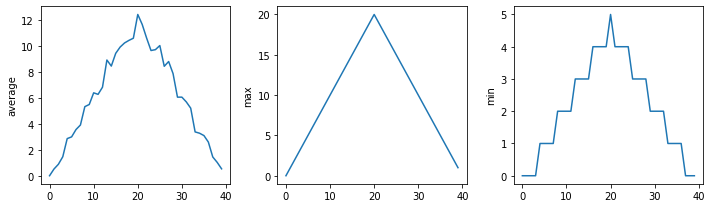

suspicious looking maxima 



In [21]:
path2files = '../swc-python/data/'
filenames = sorted(glob.glob(path2files+'inflammation*.csv'))

for filename in filenames:
    print(filename)
    visualize(filename)
    detect_problems(filename)

In [22]:
###########
# Part 3. #
###########

In [23]:
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

In [24]:
z = numpy.zeros((2,2))
print(offset_mean(z, 3))

[[3. 3.]
 [3. 3.]]


In [25]:
data = numpy.loadtxt(fname = path2files+'inflammation-01.csv', delimiter = ',')
print(offset_mean(data, 0))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


In [26]:
print('original min, mean, and max are:', numpy.amin(data), numpy.mean(data), numpy.amax(data))
offset_data = offset_mean(data, 0)
print('min, mean, and max of offset data are:', numpy.amin(offset_data), numpy.mean(offset_data), numpy.amax(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


In [27]:
# shifts towards zero

In [28]:
print('stddev before:', numpy.std(data), 'and after:', numpy.std(offset_data))

stddev before: 4.613833197118566 and after: 4.613833197118566


In [29]:
print('difference in stddev before and after:', numpy.std(data) - numpy.std(offset_data))

difference in stddev before and after: 0.0


In [30]:
# offset_mean(data, target_mean_value):
# return a new array containing the original data with its mean offset to match the desired value.
# this data should be input as measurements in columns and samples as rows, etc.
def offset_mean(data, target_mean_value):
    return (data -numpy.mean(data)) + target_mean_value

In [31]:
# docstring example
def offset_mean(data, target_mean_value):
    """return a new array containing the original data with its mean offset to match the odesired value"""
    return(data - numpy.mean(data)) + target_mean_value

In [32]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    return a new array containing the original data with its mean offset to match the odesired value



In [33]:
def offset_mean(data, target_mean_value):
    """
    Return a new array containing the original data
    with its mean offset to match the desired value.
    
    examples:
    ---------
    >>>>offset_mean([1,2,3], 0)
    array([-1., 0., 1.])
    """
    return (data - numpy.mean(data)) + target_mean_value

In [34]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.
    
    examples:
    ---------
    >>>>offset_mean([1,2,3], 0)
    array([-1., 0., 1.])



In [35]:
###########
# Part 4. #
###########

In [37]:
numpy.loadtxt(path2files+'inflammation-01.csv', delimiter = ',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [39]:
# numpy.loadtxt(path2files+'inflammation-01.csv', ',')
# gives error : SyntaxError: unexpected EOF while parsing
def offset_mean(data, target_mean_value = 0.0):
    """
    Return a new array containing the original data
    with its mean offset to match the desired value.
    
    examples:
    ---------
    >>>>offset_mean([1,2,3], 0)
    array([-1., 0., 1.])
    """
    return (data - numpy.mean(data)) + target_mean_value

In [40]:
test_data = numpy.zeros((2,2))
print(offset_mean(test_data, 3))

[[3. 3.]
 [3. 3.]]


In [41]:
print(offset_mean(test_data))

[[0. 0.]
 [0. 0.]]


In [42]:
def display(a=1, b=2, c=3):
    print('a', a)
    print('b', b)
    print('c', c)
    
print('no parameters:')
display()
print('one parameters:')
display(55)
print('two parameters:')
display(55,66)

no parameters:
a 1
b 2
c 3
one parameters:
a 55
b 2
c 3
two parameters:
a 55
b 66
c 3


In [43]:
print('only setting the value of c')
display(c = 77)

only setting the value of c
a 1
b 2
c 77


In [48]:
# Okay, this represents the whole journey of learning about default arguments
# numpy.loadtxt(path2files+'inflammation-01.csv', ',')
# help(numpy.loadtxt)

In [50]:
# and to demonstrate the correct functioning of np.loadtxt:
numpy.loadtxt(path2files+'inflammation-01.csv', delimiter = ',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [51]:
# poorly written 
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

# Same as above but better written for human comprehension
def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value
    
    sample_mean = sample_sum / len(sample)
    
    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)
        
    return numpy.sqrt(sum_squared_devs / (len(sample) -1 ))

<hr><font color="green"><h1>09.DefensiveProgramming</h1></font>

In [ ]:
#########################
# Defensive Programming #
#########################

In [1]:
numbers = [1.5, 2.3, 0.7, -0.001, 4.4]
total = 0.0
for num in numbers:
    assert num > 0.0, 'data should only contain positive values'
    total += num
print('total is:', total)
# gives this error:
# AssertionError: data should only contain positive values

AssertionError: data should only contain positive values

In [2]:
def normalize_rectangle(rect):
    """ Normalizes a rectangle so that it is at the origin and 1.0 units long on its longest axis.
    input should be of the format (x0, y0, x1, y1)
    (x0, y0) and (x1, y1) define the lower left and upper right corners of the rectangle respectively"""
    assert len(rect) == 4, 'rectangles must contain 4 coordinates'
    x0, y0, x1, y1 = rect
    assert x0 < x1, 'invalid X coordinates'
    assert y0 < y1, 'invalid Y coordinates'
    
    dx = x1 - x0
    dy = y1 - y0
    if dx > dy:
        scaled = dy / dx
        upper_x, upper_y = 1.0, scaled
    else:
        scaled = dx / dy
        upper_x, upper_y = scaled, 1.0
        
    assert 0 < upper_x <= 1.0, 'calculated upper x coordinate invalid'
    assert 0 < upper_y <= 1.0, 'calculated upper y coordinate invalid'
    
    return (0, 0, upper_x, upper_y)

In [3]:
print(normalize_rectangle( (0.0, 1.0, 2.0) ))
# gives error:
# AssertionError: rectangles must contain 4 coordinates

AssertionError: rectangles must contain 4 coordinates

In [4]:
print(normalize_rectangle( (4.0, 2.0, 1.0, 5.0) ))
# gives error:
# AssertionError: invalid X coordinates

AssertionError: invalid X coordinates

In [5]:
# rearranging the previous coordinates to work
print(normalize_rectangle( (1.0, 2.0, 4.0, 5.0) ))
# changing the coordinates to be different, but work
print(normalize_rectangle( (0.0, 0.0, 1.0, 5.0) ))

(0, 0, 1.0, 1.0)
(0, 0, 0.2, 1.0)


In [6]:
print(normalize_rectangle( (0.0, 0.0, 5.0, 1.0)))
# gives error:
# AssertionError: calculated upper y coordinate invalid.
# rectangle is wider than tall.
# changed ln14 to dy/dx from dx/dy

# try again
print(normalize_rectangle( (0.0, 0.0, 5.0, 1.0)))
#works now.

(0, 0, 1.0, 0.2)
(0, 0, 1.0, 0.2)


In [22]:
# Assertions are very very very useful. 
# I could have used this in so many things I've done.
# will be using it from now on.

<hr><font color="green"><h1>10.Transcription</h1></font>

In [1]:
#################
# Transcription #
#################

Goal: write program to take DNA fasta and convert into RNA sequence.

Transcription = DNA -> RNA 

1. prompt user to enter the name of a DNA fasta that will be transcribed into an RNA fasta

2. read in the file

3. translate DNA into RNA
    a. T -> U
    
4. prompt user to save the new file (RNA Output)
    a. So that we can use this file for the translation step.

5. Print RNA sequence.

***

ok lets get a fasta file now.
- got NOTCH3 (NC_000019.10)
saved as sequence.fasta, used the main CDS, not the isoform.

In [2]:
# Prompt user to enter the fasta file name
input_file_name = input("Enter the name of the input fasta file")

Enter the name of the input fasta file sequence.fasta


In [3]:
# open the input fasta file and read the DNA sequence

with open(input_file_name, "r") as input_file:
    dna_sequence = ""
    for line in input_file:
        if line.startswith(">"):
            continue
        dna_sequence += line.strip()

In [4]:
# transcribe the DNA to RNA
rna_sequence = ""
for nucleotide in dna_sequence:
    if nucleotide == "T":
        rna_sequence += "U"
    else:
        rna_sequence += nucleotide

In [5]:
# prompt user to enter the output file name
output_file_name = input("Enter the name of the output file:")

Enter the name of the output file: notch3_rna.fasta


In [6]:
# save the RNA sequence to a .fasta file
with open(output_file_name, "w") as output_file:
    output_file.write(rna_sequence)
    print(f"The RNA sequence has been saved to {output_file_name}")

The RNA sequence has been saved to notch3_rna.fasta


In [7]:
print(rna_sequence)

AUGGGGCCGGGGGCCCGUGGCCGCCGCCGCCGCCGUCGCCCGAUGUCGCCGCCACCGCCACCGCCACCCGUGCGGGCGCUGCCCCUGCUGCUGCUGCUAGCGGGGCCGGGGGCUGCAGCCCCCCCUUGCCUGGACGGAAGCCCGUGUGCAAAUGGAGGUCGUUGCACCCAGCUGCCCUCCCGGGAGGCUGCCUGCCUGUGCCCGCCUGGCUGGGUGGGUGAGCGGUGUCAGCUGGAGGACCCCUGUCACUCAGGCCCCUGUGCUGGCCGUGGUGUCUGCCAGAGUUCAGUGGUGGCUGGCACCGCCCGAUUCUCAUGCCGGUGCCCCCGUGGCUUCCGAGGCCCUGACUGCUCCCUGCCAGAUCCCUGCCUCAGCAGCCCUUGUGCCCACGGUGCCCGCUGCUCAGUGGGGCCCGAUGGACGCUUCCUCUGCUCCUGCCCACCUGGCUACCAGGGCCGCAGCUGCCGAAGCGACGUGGAUGAGUGCCGGGUGGGUGAGCCCUGCCGCCAUGGUGGCACCUGCCUCAACACACCUGGCUCCUUCCGCUGCCAGUGUCCAGCUGGCUACACAGGGCCACUAUGUGAGAACCCCGCGGUGCCCUGUGCACCCUCACCAUGCCGUAACGGGGGCACCUGCAGGCAGAGUGGCGACCUCACUUACGACUGUGCCUGUCUUCCUGGGUUUGAGGGUCAGAAUUGUGAAGUGAACGUGGACGACUGUCCAGGACACCGAUGUCUCAAUGGGGGGACAUGCGUGGAUGGCGUCAACACCUAUAACUGCCAGUGCCCUCCUGAGUGGACAGGCCAGUUCUGCACGGAGGACGUGGAUGAGUGUCAGCUGCAGCCCAACGCCUGCCACAAUGGGGGUACCUGCUUCAACACGCUGGGUGGCCACAGCUGCGUGUGUGUCAAUGGCUGGACAGGCGAGAGCUGCAGUCAGAAUAUCGAUGACUGUGCCACAGCCGUGUGCUUCCAUGGGGCCACCUGCCAUGACCGCGUGG

<hr><font color="green"><h1>11.Translation</h1></font>

In [1]:
###############
# Translation #
###############

Strategy for program that will take RNA sequence in a fasta file and translate it into a protein AA sequence.

1. prompt the user to enter the name of a file that has an RNA sequence.

2. open the file the user indicated.

3. translate the RNA codons into amino acid.

4. prompt the user to enter the name for the output file.

5. print the AA sequence to console.


In [2]:
# Starting Program

In [3]:
# Prompt the user to enter the RNA.fasta filename
input_file_name = input('Enter the name of the input RNA fasta file')

Enter the name of the input RNA fasta file notch3_rna.fasta


In [4]:
# Open the input RNA file and read the RNA sequence
with open(input_file_name, "r") as input_file:
    rna_sequence = input_file.read().strip()

In [5]:
codon_table = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L",
       "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S",
       "UAU":"Y", "UAC":"Y", "UAA":"*", "UAG":"*",
       "UGU":"C", "UGC":"C", "UGA":"*", "UGG":"W",
       "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L",
       "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P",
       "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
       "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R",
       "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M",
       "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T",
       "AAU":"N", "AAC":"N", "AAA":"K", "AAG":"K",
       "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R",
       "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V",
       "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A",
       "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E",
       "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G",}

In [6]:
# translate RNA to protein

protein_sequence = " "

for i in range(0, len(rna_sequence), 3):
    codon = rna_sequence[i:i+3]
    if len(codon) == 3:
        amino_acid = codon_table[codon]
        if amino_acid == "*":
            break
        protein_sequence += amino_acid

In [7]:
# prompt the user to enter the output file name
output_file_name = input('Enter the name of the output file:')

Enter the name of the output file: Notch3_protein.txt


In [8]:
# save the protein sequence to a text file

with open(output_file_name, "w") as output_file:
    output_file.write(protein_sequence)
    print(f"the protein sequence has been saved to {output_file_name}")

the protein sequence has been saved to Notch3_protein.txt


In [9]:
print(protein_sequence)

 MGPGARGRRRRRRPMSPPPPPPPVRALPLLLLLAGPGAAAPPCLDGSPCANGGRCTQLPSREAACLCPPGWVGERCQLEDPCHSGPCAGRGVCQSSVVAGTARFSCRCPRGFRGPDCSLPDPCLSSPCAHGARCSVGPDGRFLCSCPPGYQGRSCRSDVDECRVGEPCRHGGTCLNTPGSFRCQCPAGYTGPLCENPAVPCAPSPCRNGGTCRQSGDLTYDCACLPGFEGQNCEVNVDDCPGHRCLNGGTCVDGVNTYNCQCPPEWTGQFCTEDVDECQLQPNACHNGGTCFNTLGGHSCVCVNGWTGESCSQNIDDCATAVCFHGATCHDRVASFYCACPMGKTGLLCHLDDACVSNPCHEDAICDTNPVNGRAICTCPPGFTGGACDQDVDECSIGANPCEHLGRCVNTQGSFLCQCGRGYTGPRCETDVNECLSGPCRNQATCLDRIGQFTCICMAGFTGTYCEVDIDECQSSPCVNGGVCKDRVNGFSCTCPSGFSGSTCQLDVDECASTPCRNGAKCVDQPDGYECRCAEGFEGTLCDRNVDDCSPDPCHHGRCVDGIASFSCACAPGYTGTRCESQVDECRSQPCRHGGKCLDLVDKYLCRCPSGTTGVNCEVNIDDCASNPCTFGVCRDGINRYDCVCQPGFTGPLCNVEINECASSPCGEGGSCVDGENGFRCLCPPGSLPPLCLPPSHPCAHEPCSHGICYDAPGGFRCVCEPGWSGPRCSQSLARDACESQPCRAGGTCSSDGMGFHCTCPPGVQGRQCELLSPCTPNPCEHGGRCESAPGQLPVCSCPQGWQGPRCQQDVDECAGPAPCGPHGICTNLAGSFSCTCHGGYTGPSCDQDINDCDPNPCLNGGSCQDGVGSFSCSCLPGFAGPRCARDVDECLSNPCGPGTCTDHVASFTCTCPPGYGGFHCEQDLPDCSPSSCFNGGTCVDGVNSFSCLCRPGYTGAHCQHEADPCLSRPCLHGGVCSAAHPGFRCTCLESFTGPQCQT